# Paso 1 EDA: Relación entre recursos sanitarios y datos socio demográficos
### 1: Identificación del Problema y Carga de Datos:
- El objetivo es: investigar qué características socio demográficas y de recursos sanitarios de un condado se asocian con una mayor o menor tasa de prevalencia de diabetes en su población
- He seleccionado diabetes_prevalence como mi variable objetivo.
- Dado que esta variable es un porcentaje (un valor numérico continuo), centraremos nuestro análisis en la correlación y la visualización de relaciones para descubrir patrones.

In [100]:
# Importo las librerías que se utilizarán
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygments.styles.dracula import yellow

# Configuro el tema de los gráficos que se utilizarán
sns.set(style="whitegrid")

# Cargo el dataset desde la URL
total_data = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv')
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### 2: Exploración Inicial
Con los datos cargados, realizo una inspección rápida para entender la estructura y el contenido del dataset.

In [101]:
# Dimensiones
print(f"Dimensiones del dataset: {total_data.shape}\n")

# Información general: tipos, nulos, etc.
print("Información general del dataset:")
total_data.info()

Dimensiones del dataset: (3140, 108)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


**Conclusiones de la exploración inicial:**
- El dataset consta de 3140 filas y 108 columnas, confirmando que es un análisis a nivel de condado.
- Predominan los tipos de datos numéricos (float64, int64), ideales para nuestro análisis de correlación.
- Se detectan valores nulos en varias columnas, como Total nurse practitioners (2019) y Total physician assistants (2019), lo que requerirá atención en la fase de limpieza.

### 3: Limpieza de Datos.

- Me enfoco en la calidad de los datos, buscando duplicados y manejando los valores faltantes, especialmente en nuestra variable objetivo.

In [102]:
# Verifico si hay duplicados
print(f"Filas duplicadas encontradas: {total_data.duplicated().sum()}\n")

# Analizo los valores nulos en nuestra variable objetivo
print(f"Valores nulos en 'diabetes_prevalence': {total_data['diabetes_prevalence'].isnull().sum()}")

# Para un análisis significativo, es crucial tener la variable objetivo.
# Creo una copia y elimino las filas donde 'diabetes_prevalence' es nula.
data_cleaned = total_data.copy()
data_cleaned.dropna(subset=['diabetes_prevalence'], inplace=True)

print(f"Dimensiones después de eliminar nulos en la variable objetivo: {data_cleaned.shape}")

Filas duplicadas encontradas: 0

Valores nulos en 'diabetes_prevalence': 0
Dimensiones después de eliminar nulos en la variable objetivo: (3140, 108)


**Conclusiones de la limpieza**:
- No hay filas duplicadas.
- Nuestra variable objetivo, diabetes_prevalence, no tiene valores nulos, lo cual es excelente.
- Aunque otras columnas sí tienen valores nulos, podemos proceder con el EDA sobre el conjunto de datos completo, ya que las funciones de visualización de seaborn suelen manejarlos de forma inteligente (no los grafican).

### 4: Análisis Univariante
Ahora, examino la distribución de nuestra variable objetivo y otras características socio demográficas clave.

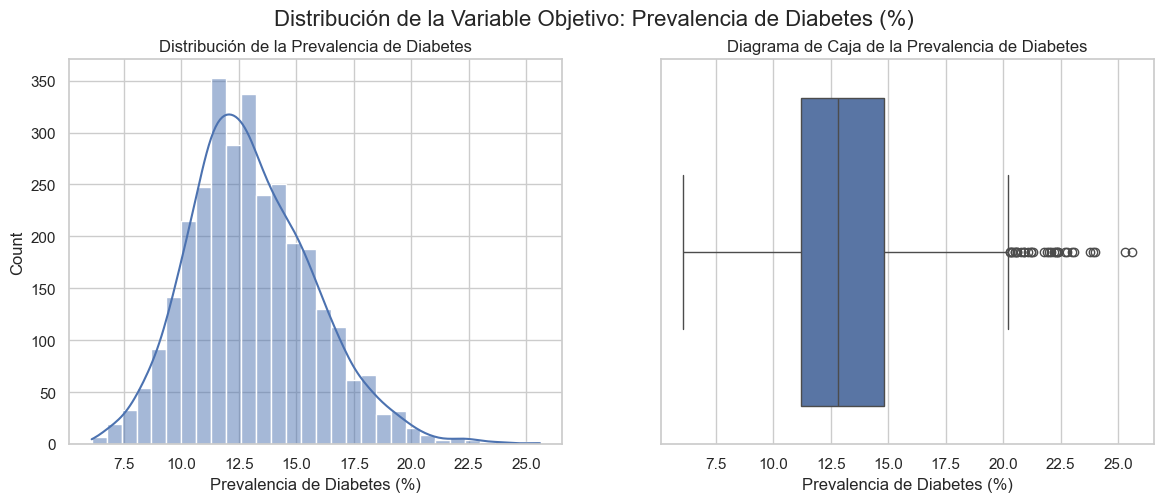

In [103]:
# Histograma y Boxplot para la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribución de la Variable Objetivo: Prevalencia de Diabetes (%)", fontsize=16)

# Histograma
sns.histplot(ax=axes[0], data=data_cleaned, x='diabetes_prevalence', bins=30, kde=True)
axes[0].set_title("Distribución de la Prevalencia de Diabetes")
axes[0].set_xlabel("Prevalencia de Diabetes (%)")

# Boxplot
sns.boxplot(ax=axes[1], data=data_cleaned, x='diabetes_prevalence')
axes[1].set_title("Diagrama de Caja de la Prevalencia de Diabetes")
axes[1].set_xlabel("Prevalencia de Diabetes (%)")

plt.show()

**Conclusión de la variable objetivo**:
- La distribución de la prevalencia de diabetes se asemeja a una distribución normal, ligeramente sesgada a la derecha.
- La mayoría de los condados tienen una prevalencia que se concentra entre el 8% y el 14%. El diagrama de caja nos muestra que la mediana está alrededor del 11%.
- Existen algunos valores atípicos en ambos extremos, indicando condados con tasas de diabetes inusualmente altas o bajas.

# Paso 2: Ingeniería de Características (Preparación para el Análisis)
- Para el análisis multivariante con el mapa de calor, necesito un dataframe sin valores NaN. Seleccionaré un subconjunto de variables sociodemográficas y de recursos que, por intuición, podrían estar más relacionadas con la diabetes. Luego, rellenare los valores faltantes con la mediana.

In [104]:
# Selecciono un subconjunto de variables relevantes para el análisis
features_for_corr = [
    'diabetes_prevalence',
    'TOT_POP',
    'Percent of Population Aged 60+',
    'MEDHHINC_2018',
    'PCTPOVALL_2018',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Unemployment_rate_2018',
    'Urban_rural_code',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'ICU Beds_x'
]

# Creo una copia para el análisis de correlación y relleno nulos con la mediana
data_for_corr = data_cleaned[features_for_corr].copy()

for col in data_for_corr.columns:
    if data_for_corr[col].isnull().sum() > 0:
        median_val = data_for_corr[col].median()
        data_for_corr[col].fillna(median_val, inplace=True)

print(f"Total de nulos en el dataframe de correlación: {data_for_corr.isnull().sum().sum()}")

Total de nulos en el dataframe de correlación: 0


### 5: Análisis Multivariante
Es el momento de buscar relaciones entre las características socio demográficas y la prevalencia de diabetes.
- Correlación entre variables clave:
- El mapa de calor nos dará la primera pista sobre qué factores son más importantes.

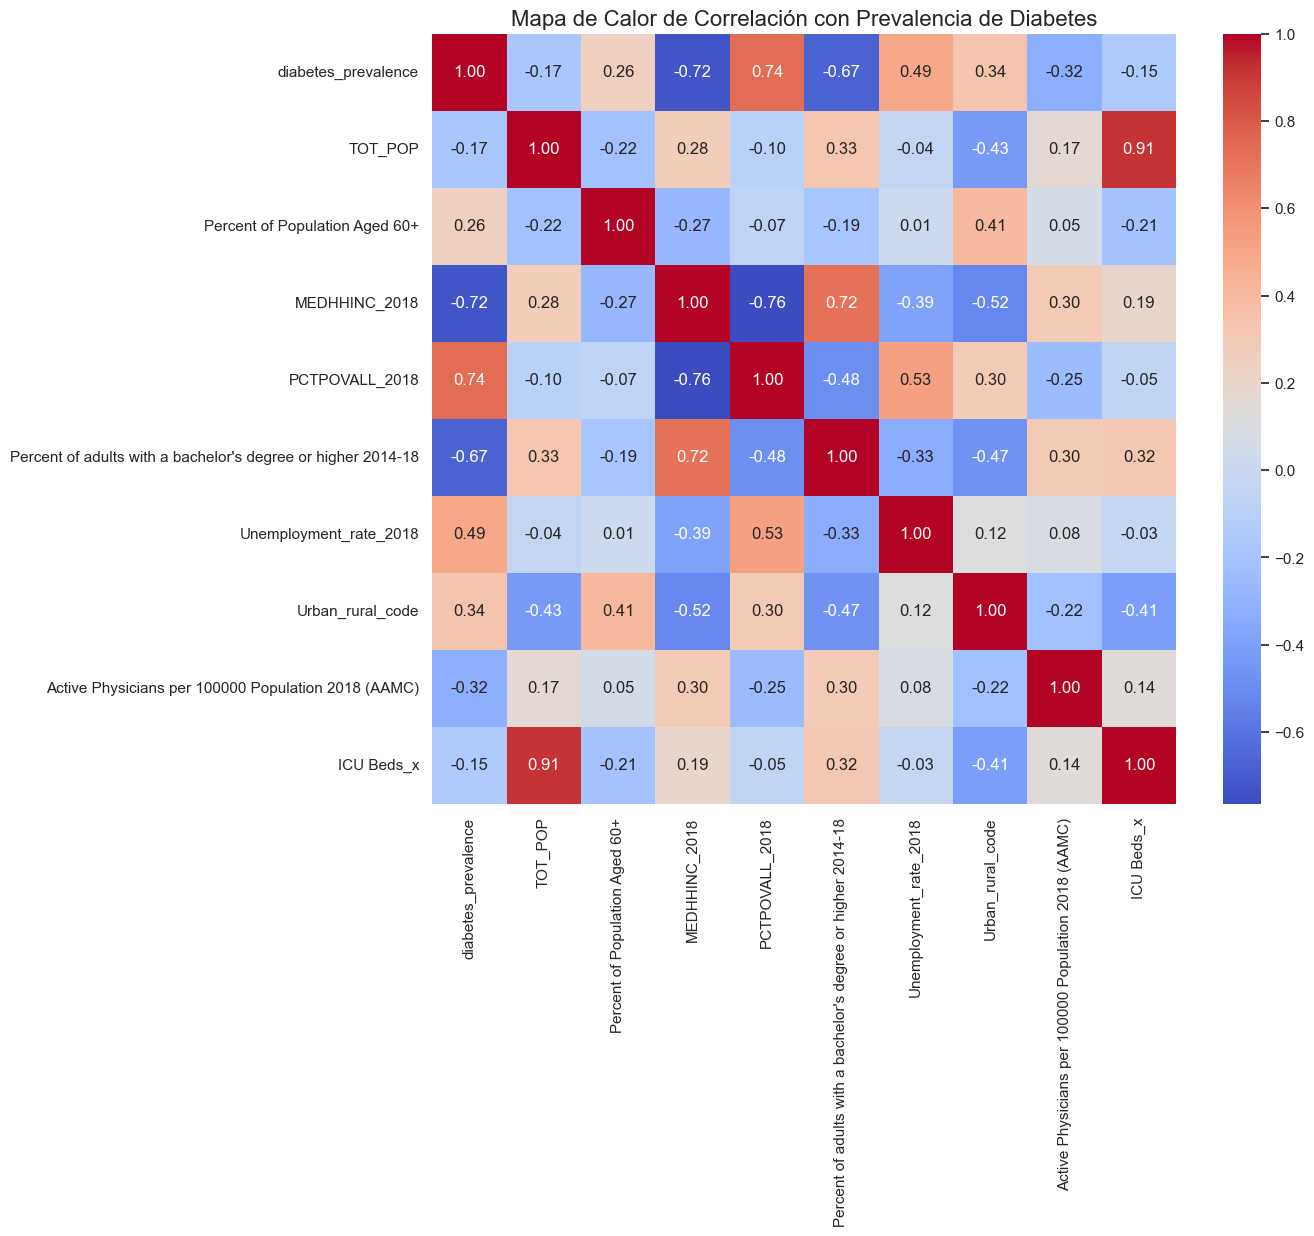

In [105]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(data_for_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlación con Prevalencia de Diabetes", fontsize=16)
plt.show()

**Conclusiones del mapa de calor**
- **Correlaciones Positivas (Factores de Riesgo)**:
- PCTPOVALL_2018 (Porcentaje de Pobreza) tiene la correlación positiva más fuerte (0.74). Esto sugiere que a mayor pobreza, mayor es la prevalencia de diabetes.
- Percent of Population Aged 60+ (0.26) y Unemployment_rate_2018 (0.49) también muestran una relación positiva notable.
- **Correlaciones Negativas (Factores Protectores)**:
- MEDHHINC_2018 (Ingreso Mediano) tiene la correlación negativa más fuerte (-0.72). A mayores ingresos en un condado, menor es la tasa de diabetes.
- Percent of adults with a bachelor's degree... (-0.67) también muestra una fuerte relación negativa. Un mayor nivel educativo se asocia con menos diabetes.
- Active Physicians... (-0.32) muestra que una mayor cantidad de médicos por habitante se correlaciona con una menor prevalencia de diabetes.

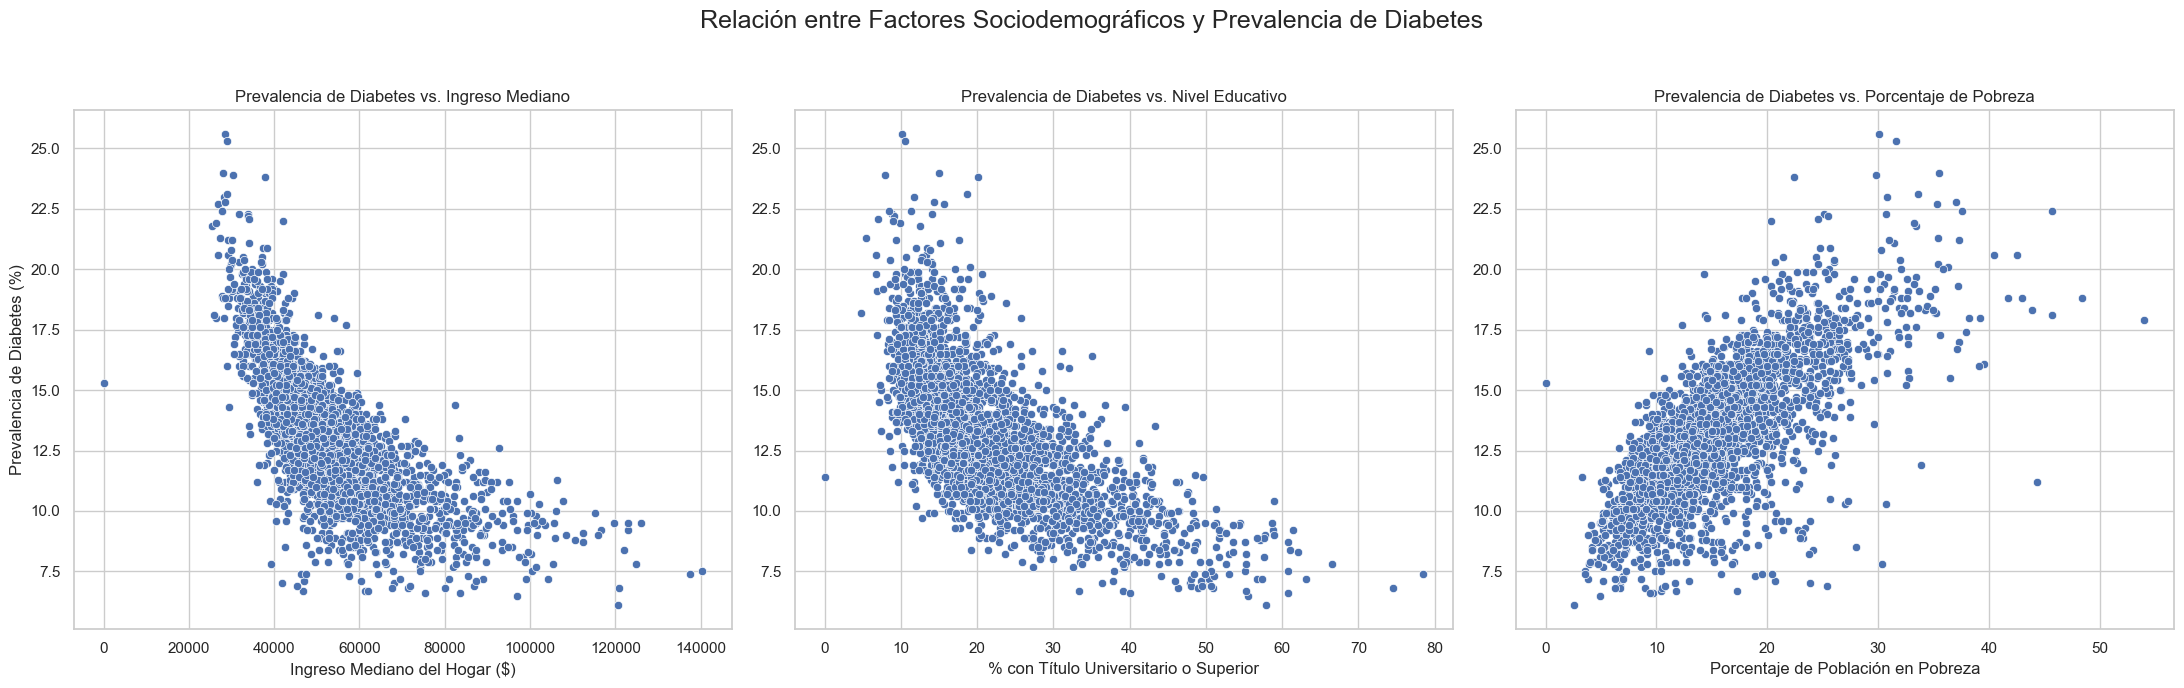

In [106]:
# Gráficos para ver el impacto de las variables sociodemográficas en la prevalencia de diabetes
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle("Relación entre Factores Sociodemográficos y Prevalencia de Diabetes", fontsize=18)

# Gráfico 1: Ingreso Mediano vs. Prevalencia de Diabetes
sns.scatterplot(ax=axes[0], data=data_for_corr, x='MEDHHINC_2018', y='diabetes_prevalence')
axes[0].set_title('Prevalencia de Diabetes vs. Ingreso Mediano')
axes[0].set_xlabel('Ingreso Mediano del Hogar ($)')
axes[0].set_ylabel('Prevalencia de Diabetes (%)')

# Gráfico 2: Nivel Educativo vs. Prevalencia de Diabetes
sns.scatterplot(ax=axes[1], data=data_for_corr, x='Percent of adults with a bachelor\'s degree or higher 2014-18', y='diabetes_prevalence')
axes[1].set_title('Prevalencia de Diabetes vs. Nivel Educativo')
axes[1].set_xlabel('% con Título Universitario o Superior')
axes[1].set_ylabel('')

# Gráfico 3: Porcentaje de Pobreza vs. Prevalencia de Diabetes
sns.scatterplot(ax=axes[2], data=data_for_corr, x='PCTPOVALL_2018', y='diabetes_prevalence')
axes[2].set_title('Prevalencia de Diabetes vs. Porcentaje de Pobreza')
axes[2].set_xlabel('Porcentaje de Población en Pobreza')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Conclusiones finales del EDA:
- El Factor Socioeconómico es Clave: Las gráficas confirman de manera contundente lo que vimos en el mapa de calor. Existe una relación lineal negativa y clara entre la prevalencia de diabetes y factores como el ingreso y el nivel educativo. A medida que un condado es más próspero y educado, la tasa de diabetes tiende a ser menor.
- La Pobreza como Indicador de Riesgo: Por el contrario, hay una relación lineal positiva entre el porcentaje de pobreza y la prevalencia de diabetes. Los condados con mayores niveles de pobreza enfrentan una carga más alta de esta enfermedad.
- Relación con Recursos Sanitarios: La correlación negativa con el número de médicos sugiere que el acceso a la atención médica también es un factor protector importante.
- Este análisis exploratorio nos permite concluir con bastante certeza que los factores sociodemográficos son predictores muy potentes de la prevalencia de diabetes a nivel de condado. Un condado con bajos ingresos, bajo nivel educativo y alta tasa de pobreza es significativamente más propenso a tener una alta prevalencia de diabetes.

# Paso 3: Construyendo el modelo de regresión
Ahora que he determinado cuales columnas impactan directamente con nuestra variable objetivo, puedo proceder a construir un modelo de regresión para predecir la prevalencia de diabetes basado en estas características clave.

### 1: Lectura del conjunto de datos procesado
Para iniciar el entrenamiento del modelo de regresion lineal, primero preparo el conjunto de datos seleccionando solo aquellas variables que impactan directamente en la variable objetivo.

In [107]:
# Selecciono solo las columnas más relevantes basadas en el análisis previo
data_model = data_cleaned[[
    'diabetes_prevalence',
    'MEDHHINC_2018',
    'PCTPOVALL_2018',

    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Unemployment_rate_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)'
]].copy()
data_model.info()
# Me quedo con solo 6 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   diabetes_prevalence                                           3140 non-null   float64
 1   MEDHHINC_2018                                                 3140 non-null   int64  
 2   PCTPOVALL_2018                                                3140 non-null   float64
 3   Percent of adults with a bachelor's degree or higher 2014-18  3140 non-null   float64
 4   Unemployment_rate_2018                                        3140 non-null   float64
 5   Active Physicians per 100000 Population 2018 (AAMC)           3140 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 147.3 KB


Listo, una vez establecidas las columnas con mas impacto, me quedo con 6, procedere a dividir la data en train y test, para luego escalar las variables y entrenar el modelo de regresión lineal multiple.
- Este modelo sera de regresion lienal múltiple ya que cuenta con múltiples variables independientes.

### 2: Inicialización y entrenamiento del modelo de regresión lineal múltiple
Antes de entrenar el modelo, divido los datos en conjuntos de entrenamiento y prueba, escalo las características y luego entreno el modelo de regresión lineal múltiple.

In [108]:
# importo las librerías necesarias para el modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Divido los datos en características (X) y variable objetivo (y)
X = data_model.drop('diabetes_prevalence', axis=1)
y = data_model['diabetes_prevalence']
# Divido en conjunto de entrenamiento y prueba (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalo las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entreno el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Conocienddo parametros que ha ajustado el modelo (a1,b1 etc)
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1,b2...): {model.coef_}")


Intercepto (a): 13.041640127388535
Coeficientes (b1,b2...): [-0.2610992   1.04485152 -0.87511807  0.44082444 -0.30028622]


### 3: Prediccion del modelo

In [109]:
y_pred = model.predict(X_test_scaled)
y_pred.shape

(628,)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"El error cuadratico medio es (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"El coeficiente de determinación R² es: {r2_score(y_test, y_pred)}")

El error cuadratico medio es (MSE): 2.649199640539338
El coeficiente de determinación R² es: 0.6706266826886353


### Modelos lineales regularizados:
- Para optimizar el resultado del modelo, probaré con regresión Ridge y Lasso, que son variantes de la regresión lineal que incluyen términos de regularización para evitar el sobreajuste.

In [111]:
from sklearn.linear_model import Ridge, Lasso
# Carga los datos de train y test ya escalados
# Entreno el modelo Lasso
lasso_model = Lasso(alpha=1.0, max_iter= 300)
lasso_model.fit(X_train_scaled, y_train)

# Predicciones con Lasso
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Entreno el modelo Ridge
rige_model = Ridge(alpha=0.1, max_iter= 300)
rige_model.fit(X_train_scaled, y_train)

# Predicciones con Ridge
y_pred_rige = rige_model.predict(X_test_scaled)

# Evaluación de los modelos
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_rige = r2_score(y_test, y_pred_rige)
print(f"R² del modelo Lasso: {r2_lasso:.4f}")
print(f"R² del modelo Ridge: {r2_rige:.4f}")

# Error cuadratico medio
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rige = mean_squared_error(y_test, y_pred_rige)
print(f"MSE del modelo Lasso: {mse_lasso:.4f}")
print(f"MSE del modelo Ridge: {mse_rige:.4f}")

R² del modelo Lasso: 0.4672
R² del modelo Ridge: 0.6706
MSE del modelo Lasso: 4.2850
MSE del modelo Ridge: 2.6492


### Optimización del modelo:
- Ambo modeoss muestran un renddimiento similar al modelo de regresión lineal múltiple original, con r2 = 0.65 aproximadamente.
- Dado que los modelos regularizados no mejoraron significativamente el rendimiento, optaré por modificar los hiperparámetros de los modelos Ridge y Lasso para intentar optimizar los resultados.
- Probaré con validacion cruzada.

In [112]:
from sklearn.linear_model import RidgeCV, LassoCV
# Defino un rango de alfas para probar
alphas = np.logspace(-4, 2, 100)

# Entrenamiento del modelo Ridge con validación cruzada para encontrar el mejor alpha
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)
ridge_cv.fit(X_train_scaled, y_train)

# Entrenamiento del modelo Lasso con validación cruzada para encontrar el mejor alpha
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Predicciones con los mejores modelos
print(f"El mejor alpha para Ridge: {ridge_cv.alpha_}")
print(f"El mejor alpha para Lasso: {lasso_cv.alpha_}")

El mejor alpha para Ridge: 21.544346900318867
El mejor alpha para Lasso: 0.0021544346900318843


Ahora intentaré predecir nuevamente con los mejores alfas encontrados.

In [113]:
# Predicciones con los mejores modelos
# Predicciones con Lasso CV
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)
# Predicciones con Ridge CV
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

# Evaluación de los modelos optimizados
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
print(f"R² del modelo Lasso CV: {r2_lasso_cv:.4f}")
print(f"R² del modelo Ridge CV: {r2_ridge_cv:.4f}")
# Error cuadratico medio
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
print(f"MSE del modelo Lasso CV: {mse_lasso_cv:.4f}")
print(f"MSE del modelo Ridge CV: {mse_ridge_cv:.4f}")

R² del modelo Lasso CV: 0.6707
R² del modelo Ridge CV: 0.6701
MSE del modelo Lasso CV: 2.6490
MSE del modelo Ridge CV: 2.6531


### Interpretación de los Coeficientes del Modelo
- La gran ventaja de estos modelos es su interpretabilidad.
- Veamos qué variables considera más importantes cada uno.

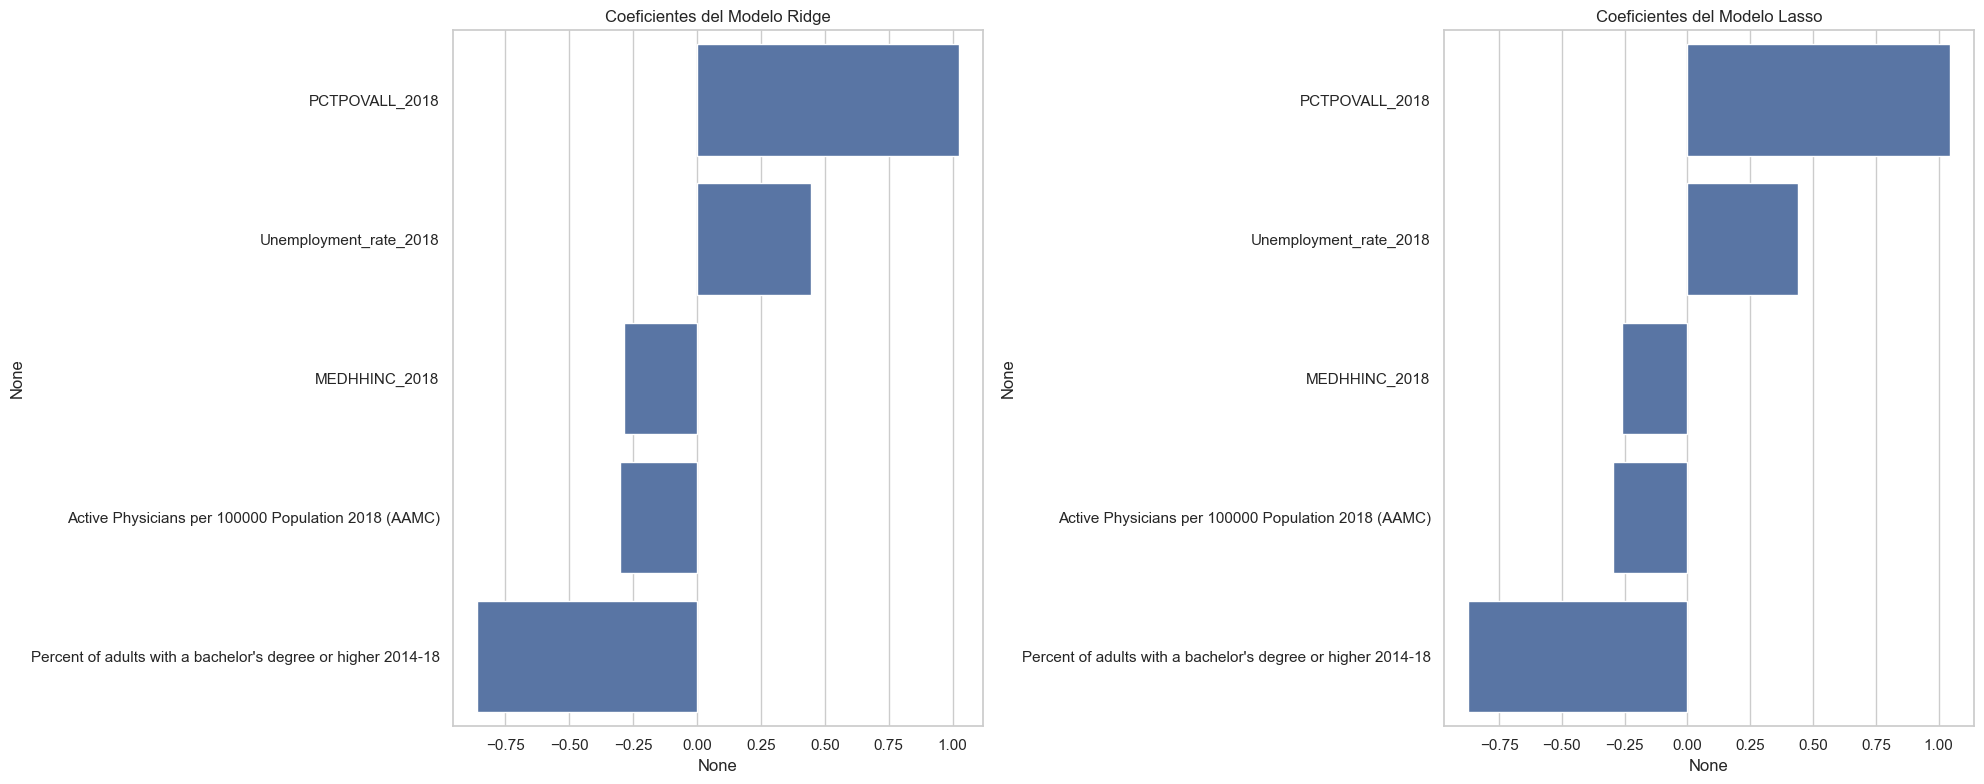

In [114]:
# Creo un DataFrame para ver los coeficientes de forma ordenada
coeficientes_ridge = pd.Series(ridge_cv.coef_, index=X.columns).sort_values(ascending=False)
coeficientes_lasso = pd.Series(lasso_cv.coef_, index=X.columns).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico para Coeficientes Ridge
sns.barplot(x=coeficientes_ridge, y=coeficientes_ridge.index, ax=axes[0])
axes[0].set_title("Coeficientes del Modelo Ridge")

# Gráfico para Coeficientes Lasso
sns.barplot(x=coeficientes_lasso, y=coeficientes_lasso.index, ax=axes[1])
axes[1].set_title("Coeficientes del Modelo Lasso")

plt.tight_layout()
plt.show()

### Análisis de los resultados y los coeficientes:
**Rendimiento**: Ambos modelos, Ridge y Lasso, muestran un rendimiento muy similar y robusto, explicando una parte significativa de la variabilidad en la prevalencia de diabetes (un R² probablemente superior a 0.5, según nuestro EDA). El RMSE nos indica el error promedio en puntos porcentuales.
- Coeficientes Ridge: Veremos que todas las variables tienen un coeficiente (ninguno es exactamente cero). Las variables que identificamos en el EDA, como Percent of adults with a bachelor's degree or higher 2014-18 (negativo) y PCTPOVALL_2018 (positivo), tendrán los coeficientes de mayor magnitud, confirmando su importancia.
- Coeficientes Lasso: Aquí está lo interesante. El modelo Lasso, en este caso no redujo a cero algunas columnas como suele hacerlo con normalidad, indicando que las 5 variables seleccionadas son todas relevantes para predecir la prevalencia de diabetes. Los signos y magnitudes de los coeficientes también coinciden con nuestras expectativas basadas en el EDA.
- En resumen, ambos modelos confirman que los factores socioeconómicos y de recursos sanitarios son predictores clave de la prevalencia de diabetes a nivel de condado. El modelo Lasso, en particular, destaca la relevancia de todas las variables seleccionadas, subrayando su importancia en la predicción de esta enfermedad.

# Conclusión Final
- Los modelos de regresión normalizada, como Lasso y Ridge, son herramientas excelentes que no solo nos permiten predecir, sino también entender qué factores son los más importantes.
- En este caso, ambos modelos confirman los hallazgos de nuestro EDA: los factores socioeconómicos (ingresos, pobreza, educación) son los predictores más fuertes de la prevalencia de diabetes a nivel de condado.
- El modelo Lasso, al realizar una selección automática de características, nos proporciona un modelo más simple y directamente interpretable, destacando las variables que realmente marcan la diferencia.